<h1>Data Science Project: Ethnic Bias of Standardized Testing</h1>
<h4>By: Mandy Yu, Fall 2021</h4>

The institutionalized Standardized Testing of New York State has inaccurately reflected students’ mental capacities. This project explores whether or not there is a correlation between the New York Statewide English Language Arts and Math Exam results and student ethnicity across all school districts. In this project, the ethnic composition of test results will be explored to expose the inaccuracy and unfairness of standardized testing. 

In [1]:
import pandas as pd
import pandasql as psql
import requests
import json
import folium
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

<h2> Gathering and Cleaning Data </h2>

This project explores data on New York Statewide English Language Arts and Math exams from the 2012-13 to 2017-18 school years. 
In the 2018-19 school year, the statewide exam was changed from three days of testing to two. Thus, data from the 2018-19 school year was omitted. The project also utilizes geographical data to create a mapped visualization of the correlation between exam results and ethnicity. 

The NY Statewide ELA and Math Exams are graded on a scale of 1-4 where:
<ul>
    <li> 1: Little or No Mastery </li>
    <li> 2: Partial Mastery of Target </li>
    <li> 3: Meets Expectations </li>
    <li> 4: Advanced </li>
</ul>

**ELA Test Results from 2013-2018 by District**

In [2]:
res = requests.get('https://data.cityofnewyork.us/resource/gu76-8i7h.json?$limit=32826')
cols = {'dbn': 'DBN', 'school_name':'School Name', 'grade': 'Grade', 'year':'Year', \
        'number_tested':'Number Tested', 'mean_scale_score':'Mean Scale Score','level_1':'# Level 1', 'level_1_1':'% Level 1', \
        'level_2':'# Level 2', 'level_2_1':'% Level 2', 'level_3':'# Level 3', 'level_3_1':'% Level 3', \
        'level_4':'# Level 4', 'level_4_1':'% Level 4', 'level_3_4': '# Level 3+4', 'level_3_4_1':'% Level 3+4'}
# Extract columns from json and rename the columns 
ela_df = pd.DataFrame(res.json(), columns = cols).rename(columns = cols)
ela_df = ela_df.loc[ela_df['Mean Scale Score'] != 's'] # there exists rows without number values
ela_df = ela_df.loc[ela_df['Grade'] != 'All Grades']
ela_df

DBN                                    School Name Grade  Year  \
0      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2013   
1      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2014   
2      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2015   
3      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2016   
4      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2017   
...       ...                                            ...   ...   ...   
32814  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2015   
32815  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2016   
32816  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2017   
32817  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2018   
32818  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2019   

      Number Tested Mean Scale Score # Level 1 % Level 1 # Level 2 % Level 2  \
0                27              289        14      51.9        11      40.7   
1                18              285        10      55.6         8      44.4   
2                16              282         9      56.3         5      31.3   
3                20              293        10      50.0         6      30.0   
4                27              302        10      37.0         8      29.6   
...             ...              ...       ...       ...       ...       ...   
32814           124              285        52      41.9        60      48.4   
32815            92              291        27      29.3        53      57.6   
32816            85              291        26      30.6        44      51.8   
32817            90              591        24      26.7        48      53.3   
32818           109              596        16      14.7        57      52.3   

      # Level 3 % Level 3 # Level 4 % Level 4 # Level 3+4 % Level 3+4  
0             2       7.4         0       0.0           2         7.4  
1             0       0.0         0       0.0           0         0.0  
2             2      12.5         0       0.0           2        12.5  
3             4      20.0         0       0.0           4        20.0  
4             7      25.9         2       7.4           9        33.3  
...         ...       ...       ...       ...         ...         ...  
32814        10       8.1         2       1.6          12         9.7  
32815        11      12.0         1       1.1          12        13.0  
32816        12      14.1         3       3.5          15        17.6  
32817        16      17.8         2       2.2          18        20.0  
32818        28      25.7         8       7.3          36        33.0  

[25205 rows x 16 columns]

*Data obtained from OpenData NYC: https://data.cityofnewyork.us/Education/2013-2019-English-Language-Arts-ELA-Test-Results-S/gu76-8i7h*

**Math Test Results from 2013-2018 by District**

In [3]:
res = requests.get('https://data.cityofnewyork.us/resource/74ah-8ukf.json?$limit=32826')

# Extract columns from json and rename the columns (same columns as ela_df)
math_df = pd.DataFrame(res.json(), columns = cols).rename(columns = cols)
math_df = math_df.loc[math_df['Mean Scale Score'] != 's'] # there exists rows without number values
math_df = math_df.loc[math_df['Grade'] != 'All Grades']

math_df

DBN                                    School Name Grade  Year  \
0      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2013   
1      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2014   
2      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2015   
3      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2016   
4      01M015                      P.S. 015 ROBERTO CLEMENTE     3  2017   
...       ...                                            ...   ...   ...   
32594  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     7  2019   
32595  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2015   
32596  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2016   
32597  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2017   
32598  32K562  EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION     8  2019   

      Number Tested Mean Scale Score # Level 1 % Level 1 # Level 2 % Level 2  \
0                27              278        16      59.3        11      40.7   
1                18              286         6      33.3         9      50.0   
2                17              280        10      58.8         4      23.5   
3                21              275        13      61.9         4      19.0   
4                29              302         8      27.6         9      31.0   
...             ...              ...       ...       ...       ...       ...   
32594           116              590        57      49.1        39      33.6   
32595           128              268        97      75.8        31      24.2   
32596            91              274        55      60.4        33      36.3   
32597            88              268        59      67.0        25      28.4   
32598           108              595        53      49.1        34      31.5   

      # Level 3 % Level 3 # Level 4 % Level 4 # Level 3+4 % Level 3+4  
0             0       0.0         0       0.0           0         0.0  
1             2      11.1         1       5.6           3        16.7  
2             2      11.8         1       5.9           3        17.6  
3             4      19.0         0       0.0           4        19.0  
4             7      24.1         5      17.2          12        41.4  
...         ...       ...       ...       ...         ...         ...  
32594        19      16.4         1       0.9          20        17.2  
32595         0       0.0         0       0.0           0         0.0  
32596         3       3.3         0       0.0           3         3.3  
32597         3       3.4         1       1.1           4         4.5  
32598        16      14.8         5       4.6          21        19.4  

[24953 rows x 16 columns]

*Data obtained from OpenData NYC: https://data.cityofnewyork.us/Education/2013-2019-Math-Test-Results-School-SWD-Ethnicity-G/74ah-8ukf*

To effectively work with these number values, we need to convert columns to the appropriate datatypes. This applies to both math and ela dataframes.

In [4]:
ela_df.dtypes

DBN                 object
School Name         object
Grade               object
Year                object
Number Tested       object
Mean Scale Score    object
# Level 1           object
% Level 1           object
# Level 2           object
% Level 2           object
# Level 3           object
% Level 3           object
# Level 4           object
% Level 4           object
# Level 3+4         object
% Level 3+4         object
dtype: object

In [5]:
ela_df['Grade'] = ela_df['Grade'].astype(int)
math_df['Grade'] = math_df['Grade'].astype(int)
cols = ['Number Tested', 'Mean Scale Score', '# Level 1','% Level 1', '# Level 2','% Level 2',\
        '# Level 3','% Level 3', '# Level 4','% Level 4', '# Level 3+4', '% Level 3+4']
for col in cols:
    ela_df[col] = ela_df[col].astype(float)
    math_df[col] = math_df[col].astype(float)

In [6]:
ela_df.dtypes

DBN                  object
School Name          object
Grade                 int64
Year                 object
Number Tested       float64
Mean Scale Score    float64
# Level 1           float64
% Level 1           float64
# Level 2           float64
% Level 2           float64
# Level 3           float64
% Level 3           float64
# Level 4           float64
% Level 4           float64
# Level 3+4         float64
% Level 3+4         float64
dtype: object

**Ethnic Demographics of NYC Public Schools from 2013-2018**

In [7]:
res = requests.get('https://data.cityofnewyork.us/resource/s52a-8aq6.json?$limit=8972')
cols = {'dbn':'DBN', 'school_name':'School Name', 'year':'Year', 'total_enrollment':'Total Enrollment', \
        'grade_3':'Grade 3', 'grade_4':'Grade 4','grade_5':'Grade 5','grade_6':'Grade 6','grade_7':'Grade 7', \
        'grade_8':'Grade 8','asian_1':'# Asian', 'asian_2':'% Asian', 'black_1':'# Black', 'black_2':'% Black', \
        'hispanic_1':'# Hispanic', 'hispanic_2':'% Hispanic', 'multiple_race_categories_not_represented_1':'# Other',\
        'multiple_race_categories_not_represented_2':'% Other', 'white_1':'# White', 'white_2':'% White'}
#         'students_with_disabilities_1':'# Students with Disabilities', 'students_with_disabilities_2':'% Students with Disabilities', \
#         'english_language_learners_1':'# ELL','english_language_learners_2':'% ELL', 'poverty_1':'# Poverty', 'poverty_2':'% Poverty', \
#        'economic_need_index':'Economic Need Index'}

#Extract columns from json and rename the columns to easily distinguish # and % 
demographics_df = pd.DataFrame(res.json(), columns = cols).rename(columns=cols)

demographics_df

DBN                        School Name     Year Total Enrollment  \
0     01M015          P.S. 015 Roberto Clemente  2013-14              190   
1     01M015          P.S. 015 Roberto Clemente  2014-15              183   
2     01M015          P.S. 015 Roberto Clemente  2015-16              176   
3     01M015          P.S. 015 Roberto Clemente  2016-17              178   
4     01M015          P.S. 015 Roberto Clemente  2017-18              190   
...      ...                                ...      ...              ...   
8967  84X730  Bronx Charter School for the Arts  2013-14              319   
8968  84X730  Bronx Charter School for the Arts  2014-15              316   
8969  84X730  Bronx Charter School for the Arts  2015-16              323   
8970  84X730  Bronx Charter School for the Arts  2016-17              320   
8971  84X730  Bronx Charter School for the Arts  2017-18              314   

     Grade 3 Grade 4 Grade 5 Grade 6 Grade 7 Grade 8 # Asian % Asian # Black  \
0         16      26      23       0       0       0       9     4.7      72   
1         19      17      24       0       0       0       8     4.4      65   
2         23      17      18       0       0       0       9     5.1      57   
3         31      24      18       0       0       0      14     7.9      51   
4         23      31      26       0       0       0      20    10.5      52   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8967      56      53      48       0       0       0       1     0.3      97   
8968      53      47      52       0       0       0       2     0.6      93   
8969      55      57      48       0       0       0       2     0.6      92   
8970      52      53      52       2       0       0       2     0.6      76   
8971      51      52      54       2       0       0       2     0.6      65   

     % Black # Hispanic % Hispanic # Other % Other # White % White  
0       37.9        104       54.7       2     1.1       3     1.6  
1       35.5        107       58.5       1     0.5       2     1.1  
2       32.4        105       59.7       3     1.7       2     1.1  
3       28.7        105       59.0       4     2.2       4     2.2  
4       27.4        110       57.9       2     1.1       6     3.2  
...      ...        ...        ...     ...     ...     ...     ...  
8967    30.4        212       66.5       6     1.9       3     0.9  
8968    29.4        214       67.7       5     1.6       2     0.6  
8969    28.5        218       67.5       6     1.9       5     1.5  
8970    23.7        236       73.8       3     0.9       3     0.9  
8971    20.7        243       77.4       3     1.0       1     0.3  

[8972 rows x 20 columns]

*Data obtained from OpenData NYC: https://data.cityofnewyork.us/Education/2013-2018-Demographic-Snapshot-School/s52a-8aq6*

I utilized apply() to extract the district for all schools for the ELA, Math, and Demographic dataframes. This will be used to visualize by district.

In [8]:
"""
@param name: string of public school code formatted as "01M015" 
@return: district extracted from public school code
"""
def extractDistrict(name):
    return  int(name[:2])

In [9]:
ela_df.insert(0, 'District', ela_df['DBN'].apply(extractDistrict))

ela_df.head()

District     DBN                School Name  Grade  Year  Number Tested  \
0         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2013           27.0   
1         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2014           18.0   
2         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2015           16.0   
3         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2016           20.0   
4         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2017           27.0   

   Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
0             289.0       14.0       51.9       11.0       40.7        2.0   
1             285.0       10.0       55.6        8.0       44.4        0.0   
2             282.0        9.0       56.3        5.0       31.3        2.0   
3             293.0       10.0       50.0        6.0       30.0        4.0   
4             302.0       10.0       37.0        8.0       29.6        7.0   

   % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0        7.4        0.0        0.0          2.0          7.4  
1        0.0        0.0        0.0          0.0          0.0  
2       12.5        0.0        0.0          2.0         12.5  
3       20.0        0.0        0.0          4.0         20.0  
4       25.9        2.0        7.4          9.0         33.3

In [10]:
math_df.insert(0, 'District', math_df['DBN'].apply(extractDistrict))

math_df.head()

District     DBN                School Name  Grade  Year  Number Tested  \
0         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2013           27.0   
1         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2014           18.0   
2         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2015           17.0   
3         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2016           21.0   
4         1  01M015  P.S. 015 ROBERTO CLEMENTE      3  2017           29.0   

   Mean Scale Score  # Level 1  % Level 1  # Level 2  % Level 2  # Level 3  \
0             278.0       16.0       59.3       11.0       40.7        0.0   
1             286.0        6.0       33.3        9.0       50.0        2.0   
2             280.0       10.0       58.8        4.0       23.5        2.0   
3             275.0       13.0       61.9        4.0       19.0        4.0   
4             302.0        8.0       27.6        9.0       31.0        7.0   

   % Level 3  # Level 4  % Level 4  # Level 3+4  % Level 3+4  
0        0.0        0.0        0.0          0.0          0.0  
1       11.1        1.0        5.6          3.0         16.7  
2       11.8        1.0        5.9          3.0         17.6  
3       19.0        0.0        0.0          4.0         19.0  
4       24.1        5.0       17.2         12.0         41.4

In [11]:
demographics_df.insert(0, 'District', demographics_df['DBN'].apply(extractDistrict))

demographics_df

District     DBN                        School Name     Year  \
0            1  01M015          P.S. 015 Roberto Clemente  2013-14   
1            1  01M015          P.S. 015 Roberto Clemente  2014-15   
2            1  01M015          P.S. 015 Roberto Clemente  2015-16   
3            1  01M015          P.S. 015 Roberto Clemente  2016-17   
4            1  01M015          P.S. 015 Roberto Clemente  2017-18   
...        ...     ...                                ...      ...   
8967        84  84X730  Bronx Charter School for the Arts  2013-14   
8968        84  84X730  Bronx Charter School for the Arts  2014-15   
8969        84  84X730  Bronx Charter School for the Arts  2015-16   
8970        84  84X730  Bronx Charter School for the Arts  2016-17   
8971        84  84X730  Bronx Charter School for the Arts  2017-18   

     Total Enrollment Grade 3 Grade 4 Grade 5 Grade 6 Grade 7  ... # Asian  \
0                 190      16      26      23       0       0  ...       9   
1                 183      19      17      24       0       0  ...       8   
2                 176      23      17      18       0       0  ...       9   
3                 178      31      24      18       0       0  ...      14   
4                 190      23      31      26       0       0  ...      20   
...               ...     ...     ...     ...     ...     ...  ...     ...   
8967              319      56      53      48       0       0  ...       1   
8968              316      53      47      52       0       0  ...       2   
8969              323      55      57      48       0       0  ...       2   
8970              320      52      53      52       2       0  ...       2   
8971              314      51      52      54       2       0  ...       2   

     % Asian # Black % Black # Hispanic % Hispanic # Other % Other # White  \
0        4.7      72    37.9        104       54.7       2     1.1       3   
1        4.4      65    35.5        107       58.5       1     0.5       2   
2        5.1      57    32.4        105       59.7       3     1.7       2   
3        7.9      51    28.7        105       59.0       4     2.2       4   
4       10.5      52    27.4        110       57.9       2     1.1       6   
...      ...     ...     ...        ...        ...     ...     ...     ...   
8967     0.3      97    30.4        212       66.5       6     1.9       3   
8968     0.6      93    29.4        214       67.7       5     1.6       2   
8969     0.6      92    28.5        218       67.5       6     1.9       5   
8970     0.6      76    23.7        236       73.8       3     0.9       3   
8971     0.6      65    20.7        243       77.4       3     1.0       1   

     % White  
0        1.6  
1        1.1  
2        1.1  
3        2.2  
4        3.2  
...      ...  
8967     0.9  
8968     0.6  
8969     1.5  
8970     0.9  
8971     0.3  

[8972 rows x 21 columns]

**NYC Public School Location Data from 2017-18**

In [12]:
res = requests.get('https://data.cityofnewyork.us/resource/p6h4-mpyy.json')
cols = {"geographical_district_code":"District", "ats_system_code":"DBN", "location_name":"School Name", "location_1":"Location"}

location_df = pd.DataFrame(res.json(), columns=cols).rename(columns=cols)
location_df.head()

District           DBN                     School Name  \
0        1  01M015             P.S. 015 Roberto Clemente   
1        1  01M019                   P.S. 019 Asher Levy   
2        1  01M020                  P.S. 020 Anna Silver   
3        1  01M034        P.S. 034 Franklin D. Roosevelt   
4        1  01M063             The STAR Academy - P.S.63   

                                            Location  
0  {'latitude': '40.722075', 'longitude': '-73.97...  
1  {'latitude': '40.730009', 'longitude': '-73.98...  
2  {'latitude': '40.721305', 'longitude': '-73.98...  
3  {'latitude': '40.726008', 'longitude': '-73.97...  
4  {'latitude': '40.72444', 'longitude': '-73.986...

*Data obtained from OpenData NYC: https://data.cityofnewyork.us/Education/2017-2018-School-Locations/p6h4-mpyy*

After cleaning the data to extract only the necessary columns and renaming them to consist with the other dataframes, the location column contains coordinates that need to be extracted.


If we take a look closer at one of the entries, it appears to be a Python dictionary. With this, indexing and extracting the columns needed can be done easily.


In [13]:
location_df["Location"][0]

{'latitude': '40.722075',
 'longitude': '-73.978747',
 'human_address': '{"address": "333 EAST 4 STREET", "city": "MANHATTAN", "state": "NY", "zip": "10009"}'}

In [14]:
"""
@param row: the location data to extract
@return the latitude, longitude, address, city, state, zip in an extractable tuple
"""
def extractLocation(row):
    address = json.loads(row['human_address']) #convert human_address string to dictionary using json
    return row['latitude'], row['longitude'], address["address"], address["city"], address["state"], address["zip"]

<h2> Analysis </h2>


The average mean scale score and average count/percentages of students were calculated for each grade in each district.

**ELA Average Test Scores by District and Grade**

In [15]:
def groupByDistrictGrade(df, columns):
    d = df.groupby('District')
    data = {key: [] for key in columns}

    for i in range(1, 33): # loop for districts 1-32
        district = d.get_group(i)
        grades = district['Grade'].unique()
        grade = district.groupby('Grade')
        for g in range(grades[0], grades[-1] + 1): # loop for grades 3-8
            data['District'].append(i)
            data['Grade'].append(g)
            data['Number Tested'].append(grade.get_group(g)['Number Tested'].sum().astype(int))
         
        for col in columns[3:]: # ignore District, Grade, and Number Tested columns
            for g in range(grades[0], grades[-1] + 1): # loop for possible grades in district (not all districts are gr3-8)
                data[col].append(float("{:.2f}".format(grade.get_group(g)[col].mean())))
    df = pd.DataFrame.from_dict(data)
    return df

In [16]:
columns = ['District', 'Grade', 'Number Tested', 'Mean Scale Score', '# Level 1', '% Level 1', '# Level 2',
           '% Level 2', '# Level 3', '% Level 3', '# Level 4', '% Level 4', '# Level 3+4', '% Level 3+4']
ela_averages = groupByDistrictGrade(ela_df, columns)

ela_averages

District  Grade  Number Tested  Mean Scale Score  # Level 1  % Level 1  \
0           1      3           4982            389.73      10.15      26.38   
1           1      4           4908            389.32       8.30      22.56   
2           1      5           4771            388.95      11.14      31.01   
3           1      6           4529            388.70      14.98      26.02   
4           1      7           4558            390.78      15.71      26.35   
..        ...    ...            ...               ...        ...        ...   
163        32      4           6443            375.99      27.29      37.79   
164        32      5           6647            375.37      32.12      47.02   
165        32      6           7362            373.36      38.06      38.92   
166        32      7           7285            377.76      37.91      37.18   
167        32      8           7252            383.21      29.80      27.16   

     # Level 2  % Level 2  # Level 3  % Level 3  # Level 4  % Level 4  \
0        11.95      33.12      14.42      33.17       5.70       7.33   
1        13.42      37.17      10.34      25.65       9.18      14.62   
2        11.80      32.54       8.74      21.33       8.41      15.10   
3        22.62      35.44      11.98      15.96      22.30      22.60   
4        21.63      33.40      19.25      24.72      15.75      15.53   
..         ...        ...        ...        ...        ...        ...   
163      27.35      39.12      12.10      17.34       4.07       5.75   
164      22.30      32.53       9.85      14.99       3.56       5.47   
165      39.55      35.93      16.23      13.62      12.86      11.52   
166      40.16      37.18      23.04      19.94       6.01       5.71   
167      42.83      40.17      26.08      22.81      11.17       9.84   

     # Level 3+4  % Level 3+4  
0          20.12        40.50  
1          19.52        40.27  
2          17.15        36.44  
3          34.29        38.55  
4          35.00        40.25  
..           ...          ...  
163        16.16        23.09  
164        13.41        20.46  
165        29.09        25.14  
166        29.06        25.65  
167        37.24        32.67  

[168 rows x 14 columns]

**Math Average Test Scores by District and Grade**

In [17]:
math_averages = groupByDistrictGrade(math_df, columns)
math_averages

District  Grade  Number Tested  Mean Scale Score  # Level 1  % Level 1  \
0           1      3           4999            390.96       9.68      27.21   
1           1      4           4935            388.56      10.21      28.83   
2           1      5           4789            391.64      11.48      32.77   
3           1      6           4558            392.57      16.00      27.72   
4           1      7           4453            391.52      19.35      32.69   
..        ...    ...            ...               ...        ...        ...   
163        32      4           6586            374.76      28.58      39.83   
164        32      5           6778            379.79      31.81      45.85   
165        32      6           7503            372.38      43.06      42.23   
166        32      7           7434            375.94      49.06      46.53   
167        32      8           6534            369.97      49.66      45.67   

     # Level 2  % Level 2  # Level 3  % Level 3  # Level 4  % Level 4  \
0        10.26      27.95       9.96      24.15      12.83      20.70   
1        10.39      29.29       8.36      21.06      12.50      20.83   
2         9.08      26.18       8.32      21.21      11.37      19.84   
3        18.90      29.10      13.16      17.61      24.29      25.57   
4        18.87      28.99      15.17      19.43      17.29      18.90   
..         ...        ...        ...        ...        ...        ...   
163      25.34      35.35      12.32      16.61       6.13       8.20   
164      20.18      28.70      12.40      18.12       4.78       7.32   
165      39.51      33.99      17.22      14.78       8.96       9.01   
166      36.68      31.35      17.93      16.02       5.66       6.10   
167      42.41      38.45      13.81      12.20       4.86       3.68   

     # Level 3+4  % Level 3+4  
0          22.79        44.84  
1          20.87        41.89  
2          19.69        41.05  
3          37.44        43.20  
4          32.46        38.32  
..           ...          ...  
163        18.45        24.81  
164        17.17        25.45  
165        26.17        23.79  
166        23.59        22.13  
167        18.68        15.87  

[168 rows x 14 columns]

The percentage of students who received a satisfactory score (3 or 4) on the statewide exam is reflected in % Level 3+4 column. Let's take a look at the range of values for every grade in all districts.

In [18]:
def calculateRangeByGrade(df, col):
    df = df.groupby('Grade')
    data = {'Grade': [], 'Lowest': [], 'Highest': [], 'Range':  []}
    for i in range(3, 9):
        highest = df.get_group(i)[col].max()
        lowest = df.get_group(i)[col].min()
        rnge = float("{:.2f}".format(highest-lowest))
        data['Grade'].append(i)
        data['Lowest'].append(lowest)
        data['Highest'].append(highest)
        data['Range'].append(rnge)
    return pd.DataFrame.from_dict(data)

In [19]:
ela_ranges_bygrade = calculateRangeByGrade(ela_averages, '% Level 3+4')
ela_ranges_bygrade

Grade  Lowest  Highest  Range
0      3   20.78    67.36  46.58
1      4   19.25    69.13  49.88
2      5   15.60    63.69  48.09
3      6   15.48    60.62  45.14
4      7   15.61    62.92  47.31
5      8   22.11    67.30  45.19

In [20]:
math_ranges_bygrade = calculateRangeByGrade(math_averages, '% Level 3+4')
math_ranges_bygrade

Grade  Lowest  Highest  Range
0      3   21.39    75.27  53.88
1      4   16.18    75.28  59.10
2      5   15.15    73.85  58.70
3      6   14.33    68.84  54.51
4      7   12.97    68.96  55.99
5      8    9.62    52.45  42.83

In both the ELA and math averages, there is a high difference between districts. In the ELA data, one district had 20.78% of their third grade students from 2013-18 receive a satisfactory score of 3 or 4. Another district had 67.36% of their third grade students from 2013-18 receive a 3 or 4. This is nearly a 50% difference. In the math data, one district had 15.15% of their 5th grade students from 2013-18 receive of 3 or 4 and another had 73.85%. That is nearly a 60% difference.

With this information, it is evident there is a difference between districts. In this project, I explore how ethnicity possibly 
influences the averages. So, let's take a look at each districts' ethnic composition.

In [21]:
demographics_df.head()

District     DBN                School Name     Year Total Enrollment  \
0         1  01M015  P.S. 015 Roberto Clemente  2013-14              190   
1         1  01M015  P.S. 015 Roberto Clemente  2014-15              183   
2         1  01M015  P.S. 015 Roberto Clemente  2015-16              176   
3         1  01M015  P.S. 015 Roberto Clemente  2016-17              178   
4         1  01M015  P.S. 015 Roberto Clemente  2017-18              190   

  Grade 3 Grade 4 Grade 5 Grade 6 Grade 7  ... # Asian % Asian # Black  \
0      16      26      23       0       0  ...       9     4.7      72   
1      19      17      24       0       0  ...       8     4.4      65   
2      23      17      18       0       0  ...       9     5.1      57   
3      31      24      18       0       0  ...      14     7.9      51   
4      23      31      26       0       0  ...      20    10.5      52   

  % Black # Hispanic % Hispanic # Other % Other # White % White  
0    37.9        104       54.7       2     1.1       3     1.6  
1    35.5        107       58.5       1     0.5       2     1.1  
2    32.4        105       59.7       3     1.7       2     1.1  
3    28.7        105       59.0       4     2.2       4     2.2  
4    27.4        110       57.9       2     1.1       6     3.2  

[5 rows x 21 columns]

First, let's convert the datatypes of the appropriate columns to floats.

In [22]:
columns = list(demographics_df.columns)
demographics_df[columns[4:]] = demographics_df[columns[4:]].astype(float)
demographics_df.dtypes

District              int64
DBN                  object
School Name          object
Year                 object
Total Enrollment    float64
Grade 3             float64
Grade 4             float64
Grade 5             float64
Grade 6             float64
Grade 7             float64
Grade 8             float64
# Asian             float64
% Asian             float64
# Black             float64
% Black             float64
# Hispanic          float64
% Hispanic          float64
# Other             float64
% Other             float64
# White             float64
% White             float64
dtype: object

Now, let's average the demographics from 2013-18 for each district.

In [23]:
def avgDemographics(df):
    districts = df.groupby('District')
    columns = list(df.columns)
    columns.remove('DBN')
    columns.remove('School Name')
    columns.remove('Year')
    data = {key: [] for key in columns}
    for i in range(1, 33): #Districts 1-32 (To match ELA and Math datasets)
        district = districts.get_group(i)
        data['District'].append(i)
        data['Total Enrollment'].append(int(district['Total Enrollment'].sum()))
        for col in columns[2:]:
            data[col].append(float("{:.2f}".format(district[col].mean())))
    return pd.DataFrame.from_dict(data)
        
    
avg_demographics = avgDemographics(demographics_df)
avg_demographics

District  Total Enrollment  Grade 3  Grade 4  Grade 5  Grade 6  Grade 7  \
0          1             56935    29.67    29.52    29.00    27.23    26.96   
1          2            309227    24.44    24.16    23.27    22.04    21.03   
2          3            111386    31.78    31.24    30.66    31.96    31.32   
3          4             65764    33.44    33.19    33.12    31.89    31.24   
4          5             57508    29.19    29.14    26.95    26.56    27.46   
5          6            112867    41.44    41.56    36.09    34.42    36.45   
6          7             93490    31.25    30.50    30.24    27.29    28.18   
7          8            137016    40.48    39.89    39.58    37.87    37.83   
8          9            170923    42.11    40.26    37.98    38.59    38.90   
9         10            271920    51.21    50.17    48.51    44.23    43.66   
10        11            188833    53.46    52.92    52.07    46.37    46.74   
11        12            114758    38.51    37.71    35.54    33.81    34.78   
12        13            106627    27.93    26.47    24.42    17.66    17.98   
13        14             94470    33.04    32.61    30.95    32.14    32.59   
14        15            154114    62.43    59.78    56.40    40.31    38.17   
15        16             33984    25.47    24.76    22.81    14.49    15.41   
16        17            111605    31.59    30.72    29.04    31.99    33.77   
17        18             78828    37.62    38.79    37.04    34.25    35.74   
18        19            109363    39.11    39.29    37.37    34.39    33.24   
19        20            249139    93.97    91.23    88.25    88.97    86.85   
20        21            173386    54.28    53.30    50.74    72.27    71.01   
21        22            169571    71.36    70.70    69.32    52.23    53.50   
22        23             47580    26.16    25.70    22.81    31.86    31.61   
23        24            288041    89.35    88.16    83.27    74.35    76.22   
24        25            183058    63.29    61.84    59.93    59.13    57.69   
25        26            158123    57.46    58.18    57.94    60.76    60.26   
26        27            219362    58.72    57.57    57.53    58.29    59.04   
27        28            199800    56.74    55.12    52.93    50.41    49.08   
28        29            132051    52.93    54.12    53.47    48.82    49.38   
29        30            197812    64.46    62.95    63.51    70.08    67.10   
30        31            300101    64.98    64.31    63.93    59.89    59.28   
31        32             61184    37.76    37.96    38.48    41.43    42.55   

    Grade 8  # Asian  % Asian  # Black  % Black  # Hispanic  % Hispanic  \
0     27.92    84.95    15.72    65.06    19.69      161.71       48.40   
1     20.94   122.04    18.55    83.58    17.66      173.82       35.67   
2     30.87    40.11     5.85   114.92    29.32      167.87       38.07   
3     31.19    31.29     5.72   106.01    27.38      257.30       60.10   
4     28.79    14.79     3.46   196.57    50.71      158.82       39.35   
5     38.63     6.31     1.23    35.41     6.72      417.75       86.38   
6     27.92     5.35     1.11   121.17    26.85      321.45       69.82   
7     38.40    28.23     4.89   115.99    25.14      326.42       63.51   
8     39.19     7.03     1.48   144.73    29.26      337.32       67.38   
9     44.56    48.67     4.42   104.68    18.00      437.40       71.83   
10    46.65    46.49     6.50   246.85    41.67      256.35       42.02   
11    35.09    11.12     2.13   119.37    26.79      323.95       68.57   
12    18.56   101.96     6.72   245.11    63.19       82.71       19.73   
13    33.66    22.74     3.61   111.68    23.24      291.83       60.36   
14    36.81   101.14    11.86    97.09    20.38      250.85       38.31   
15    16.22     5.22     1.87   219.34    75.85       51.82       18.89   
16    35.07    12.49     2.69   354.11    77.63       68.56       14.88   
17    37.72     6.30     1.30   411.22    87.5

Now, let's join our tables together to be able to plot the data and look for any correlations.

In [24]:
data = pd.merge(ela_averages,avg_demographics,on='District',how='left')
data

District  Grade  Number Tested  Mean Scale Score  # Level 1  % Level 1  \
0           1      3           4982            389.73      10.15      26.38   
1           1      4           4908            389.32       8.30      22.56   
2           1      5           4771            388.95      11.14      31.01   
3           1      6           4529            388.70      14.98      26.02   
4           1      7           4558            390.78      15.71      26.35   
..        ...    ...            ...               ...        ...        ...   
163        32      4           6443            375.99      27.29      37.79   
164        32      5           6647            375.37      32.12      47.02   
165        32      6           7362            373.36      38.06      38.92   
166        32      7           7285            377.76      37.91      37.18   
167        32      8           7252            383.21      29.80      27.16   

     # Level 2  % Level 2  # Level 3  % Level 3  ...  # Asian  % Asian  \
0        11.95      33.12      14.42      33.17  ...    84.95    15.72   
1        13.42      37.17      10.34      25.65  ...    84.95    15.72   
2        11.80      32.54       8.74      21.33  ...    84.95    15.72   
3        22.62      35.44      11.98      15.96  ...    84.95    15.72   
4        21.63      33.40      19.25      24.72  ...    84.95    15.72   
..         ...        ...        ...        ...  ...      ...      ...   
163      27.35      39.12      12.10      17.34  ...     8.91     1.79   
164      22.30      32.53       9.85      14.99  ...     8.91     1.79   
165      39.55      35.93      16.23      13.62  ...     8.91     1.79   
166      40.16      37.18      23.04      19.94  ...     8.91     1.79   
167      42.83      40.17      26.08      22.81  ...     8.91     1.79   

     # Black  % Black  # Hispanic  % Hispanic  # Other  % Other  # White  \
0      65.06    19.69      161.71        48.4    11.34     2.40    69.60   
1      65.06    19.69      161.71        48.4    11.34     2.40    69.60   
2      65.06    19.69      161.71        48.4    11.34     2.40    69.60   
3      65.06    19.69      161.71        48.4    11.34     2.40    69.60   
4      65.06    19.69      161.71        48.4    11.34     2.40    69.60   
..       ...      ...         ...         ...      ...      ...      ...   
163    82.01    18.14      351.07        77.5     2.98     0.62     8.24   
164    82.01    18.14      351.07        77.5     2.98     0.62     8.24   
165    82.01    18.14      351.07        77.5     2.98     0.62     8.24   
166    82.01    18.14      351.07        77.5     2.98     0.62     8.24   
167    82.01    18.14      351.07        77.5     2.98     0.62     8.24   

     % White  
0      13.80  
1      13.80  
2      13.80  
3      13.80  
4      13.80  
..       ...  
163     1.95  
164     1.95  
165     1.95  
166     1.95  
167     1.95  

[168 rows x 31 columns]

<h2> Visualizations </h2>


In [25]:
indexes = [2,3,5,7,9,11,13,22,24,26,28,30] #limit the columns (remove district and grade and # values)
corrdf = data[data.columns[indexes]]
corrdf.corr().style.background_gradient(cmap="Blues")

Let's take a close look at the correlation between ethnicity and percentage of students in the district who received a satisfactory grade of 3 or 4.

**% Asian vs % Level 3+4**

There is a strong positive correlation of **0.751451** between the percentage of Asian students and students with 3 or 4. This indicates that as the percentage of Asian students increases, the percentage of students who receive 3 or 4 also increases. This means the population of Asian students possibly influences the percentage of students who receive a satisfactory score. This correlation suggests that a higher percenteage of Asian students results in more students who receive a 3 or 4.

**% Black vs % Level 3+4**

There is a weak negative correlation of **-0.448200** between the percentage of Black students and students with 3 or 4. This indicates that as the percentage of Black students increases, the percentage of students who receive 3 or 4 decreases. This indicates a possible influence of ethnicity on the percentage of students who receive a satisfactory score. This correlation suggests that a higher percentage of Black students results in less students who receive 3 or 4.


<h3> Scatter Plots </h3>

**% Asian vs % Level 3+4**

In [54]:
def scatterPlot(col1, col2):
    plt.scatter(corrdf[col1], corrdf[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)

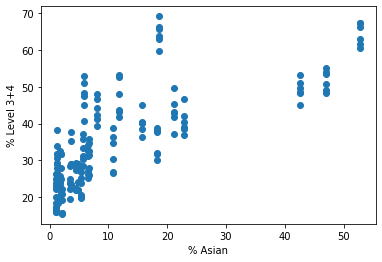

In [55]:
scatterPlot('% Asian', '% Level 3+4')

**% Black vs % Level 3+4**

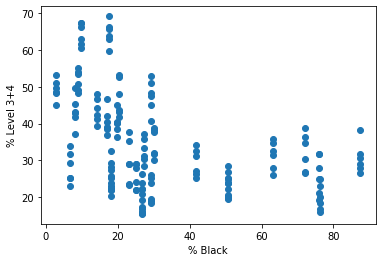

In [58]:
scatterPlot('% Black', '% Level 3+4')

**% White vs % Level 3+4**

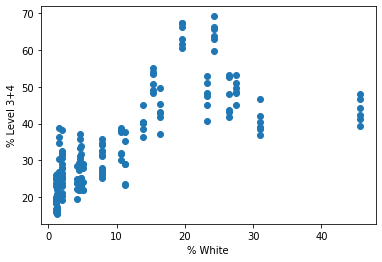

In [59]:
scatterPlot('% White', '% Level 3+4')

**% Hispanic vs % Level 3+4**

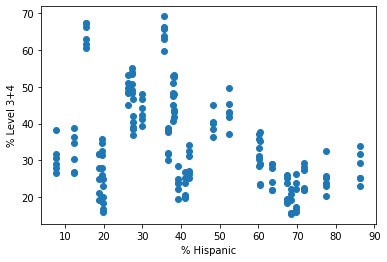

In [60]:
scatterPlot('% Hispanic', '% Level 3+4')

These scatter plots suggest that for minority groups, the schools with higher populations of minority students, the lower the average statewide test score. While this may not be directly influenced by the ethnicity, there is a suggestion that there exists this influence.

In [26]:
school_map = folium.Map(location=[40.75, -74.125], zoom_start=10)

folium.Choropleth(
    geo_data='School Districts.geojson',
    name='School Districts',
    fill_opacity=0.3,
    line_opacity=1
).add_to(school_map)

folium.LayerControl().add_to(school_map)

school_map

Let's take a look at the distribution of grades.